# Ford-Fulkerson Algorithm

**Ford-Fulkerson algorithm is a greedy approach for calculating the maximum possible flow in a network or a graph.
A term, flow network, is used to describe a network of vertices and edges with a source (`S`) and a sink (`T`). Each vertex, except `S` and `T`, can receive and send an equal amount of stuff through it. `S` can only send and `T` can only receive stuff.
We can visualize the understanding of the algorithm using a flow of liquid inside a network of pipes of different capacities. Each pipe has a certain capacity of liquid it can transfer at an instance. For this algorithm, we are going to find how much liquid can be flowed from the source to the sink at an instance using the network.**

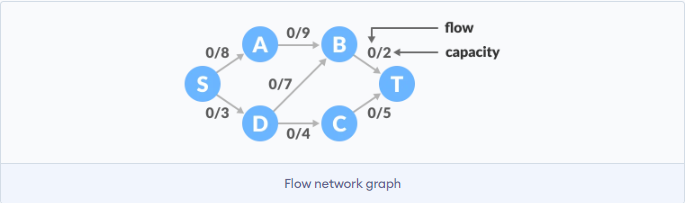

## Terminologies Used

### Augmenting Path
**It is the path available in a flow network.**

### Residual Graph
**It represents the flow network that has additional possible flow.**

### Residual Capacity
**It is the capacity of the edge after subtracting the flow from the maximum capacity.**

## How Ford-Fulkerson Algorithm works?

**The algorithm follows:**

**1. Initialize the flow in all the edges to 0.**

**2. While there is an augmenting path between the source and the sink, add this path to the flow.**

**3. Update the residual graph.**

`We can also consider reverse-path if required because if we do not consider them, we may never find a maximum flow.`

## Ford-Fulkerson Example

**The flow of all the edges is `0` at the beginning.**

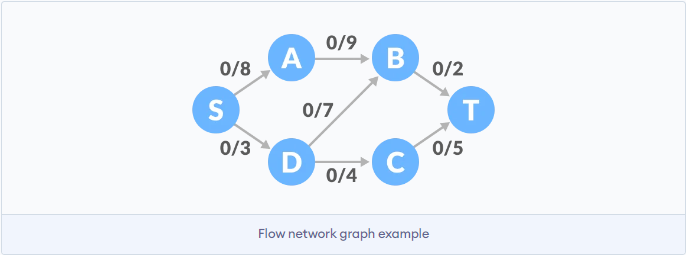

**1. Select any arbitrary path from `S` to `T`. In this step, we have selected path `S-A-B-T`.**

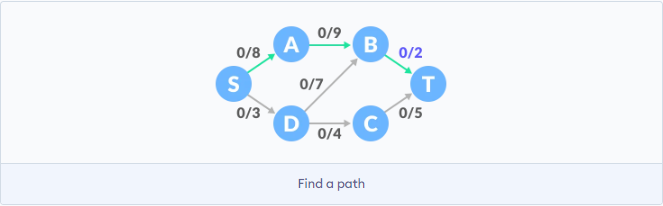

**The minimum capacity among the three edges is `2` (`B-T`). Based on this, update the flow/capacity for each path.**

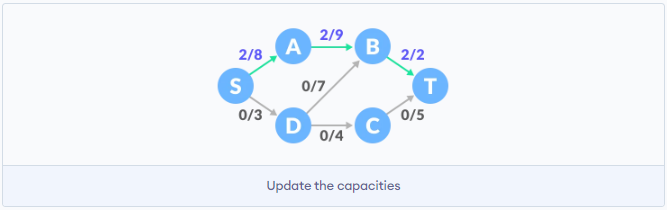

**2. Select another path `S-D-C-T`. The minimum capacity among these edges is 3 (`S-D`).**

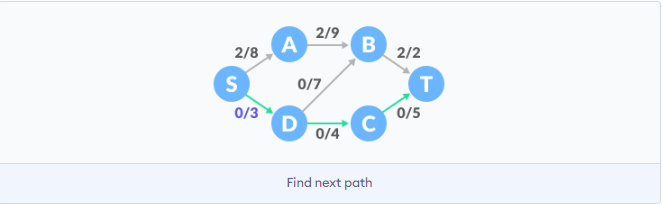

**Update the capacities according to this.**

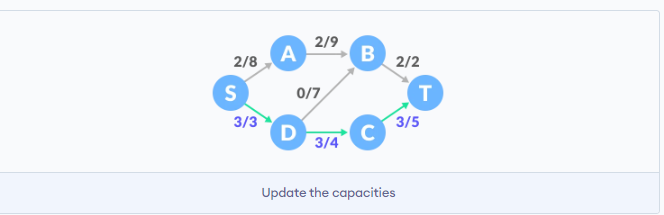

**3. Now, let us consider the reverse-path `B-D` as well. Selecting path `S-A-B-D-C-T`. The minimum residual capacity among the edges is 1 (`D-C`).**

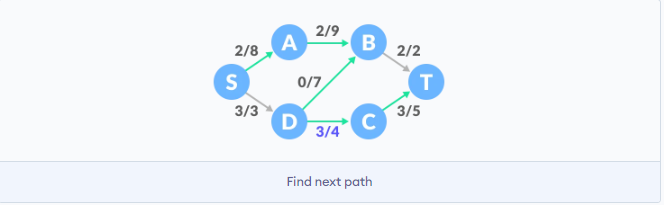

**Updating the capacities.**

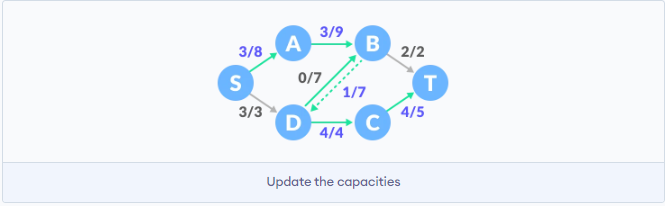

**The capacity for forward and reverse paths are considered separately.**
**4. Adding all the `flows = 2 + 3 + 1 = 6`, which is the maximum possible flow on the flow network.**

`Note that if the capacity for any edge is full, then that path cannot be used.`

In [1]:
# Ford-Fulkerson algorith in Python

from collections import defaultdict

class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)


    # Using BFS as a searching algorithm 
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


In [2]:
graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

print("Max Flow: %d " % g.ford_fulkerson(source, sink))

Max Flow: 6 


## Ford-Fulkerson Applications
* Water distribution pipeline
* Bipartite matching problem
* Circulation with demands